In [182]:
import pandas as pd                  # Wrangling
import numpy as np                   # Wrangling
from matplotlib import pyplot as plt # Graphs
import seaborn as sns                # Graphs
from time import strptime            # Wrangling
%matplotlib inline                   # Magic command to plot within Jupyter Notebook

In [10]:
# Load 'review.csv' as reviews
# Load 'profile.csv' as profiles; to be joined with reviews
reviews = pd.read_csv('review.csv')
profiles = pd.read_csv('profile.csv')

In [11]:
# Join profiles.industry into reviews
reviews = pd.merge(reviews, profiles.iloc[:, [2,8]], how='left', on='company')

In this analysis, we will only be considering the top ranking Retail companies listed on Indeed's Top 50 Companies List.

In [12]:
# Subset reviews for retail companies as reviews_retail
reviews_retail = reviews[(reviews['industry'].isin(['Retail']))]

# Exploratory Data Analysis

In [13]:
# Check for duplicate observations
# (Note: We can expect duplicate observations in the dataset because during the web scraping process, 
# the featured review for each firm is repeated on each page)
reviews_retail.duplicated().sum()

788

In [14]:
# Drop duplicate observations
reviews_retail = reviews_retail.drop_duplicates()

In [15]:
# Check for NaN values
reviews_retail.isnull().sum()

comment        0
rating         0
jobtitle       0
company        0
header         0
location       0
date           1
pro         7164
con         7872
industry       0
dtype: int64

In [16]:
# Replace NaN values with empty strings
reviews_retail = reviews_retail.replace(np.nan, '')

In [17]:
# Examine observation with empty date; the date has been misplaced in location
reviews_retail.loc[reviews_retail['date'] == '']

,comment,rating,jobtitle,company,header,location,date,pro,con,industry
55761,"Very good place to work, they support and assi...",4.0,Customer Service,Wegmans,"Excellent place to work, fun environment, fast...","October 9, 2011",,,,Retail


In [18]:
# Replace existing location with empty string and reassign date
reviews_retail.loc[reviews_retail['date'] == '', 'location'] = ''
reviews_retail.loc[reviews_retail['date'] == '', 'date'] = 'October 9, 2011'

In [19]:
# Extract month from date into new column month; this is used for analysis later
dates = reviews_retail['date'].tolist()
month = map(lambda x: strptime(x, '%B %d, %Y').tm_mon, dates)
reviews_retail['month'] = month

In [20]:
# Reorder columns
cols = reviews_retail.columns.tolist()
cols = ['company', 'industry', 'jobtitle', 'date', 'month', 'location', 'rating', 'header', 'comment', 'pro', 'con']
reviews_retail = reviews_retail[cols]

In [21]:
# Change jobtitle to lowercase; this allows for cleaner grouping later
reviews_retail['jobtitle'] = reviews_retail['jobtitle'].str.lower()

## Count of Reviews by Company

In [22]:
# Create dataframe with review counts by retail company
countbyfirm = reviews_retail.company.value_counts()
company = countbyfirm.index
count = countbyfirm.values
company = list(company)
count = list(count)
countbyfirm_df = pd.DataFrame( {'Company': company, 'Count': count})

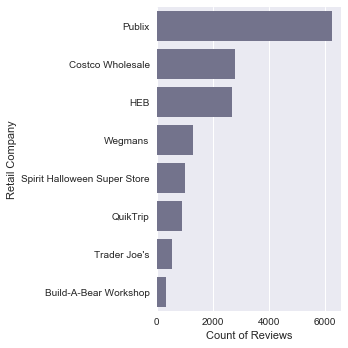

In [87]:
# Plot bar graph of review counts by retail company
plt.figure(figsize=(5,5))
reviewcounts_firm = sns.barplot(countbyfirm_df.Count, countbyfirm_df.Company, color="blue", saturation=0.1)
reviewcounts_firm.set(xlabel='Count of Reviews', ylabel='Retail Company')
plt.tight_layout()
plt.savefig('fig100.png', format='png', dpi=300)

## Review Counts by Month

In [24]:
# Create dataframe with review counts by month 
countbymonth = reviews_retail.month.value_counts()
month = countbymonth.index
month
mcount = countbymonth.values
mcount
mcount = list(mcount)
month = list(month)
countbymonth_df = pd.DataFrame( {'Month': month, 'Count': mcount})

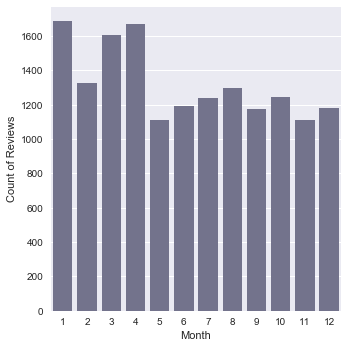

In [88]:
# Plot bar graph of review counts by month
plt.figure(figsize=(5,5))
reviewcounts_mth = sns.barplot(countbymonth_df.Month, countbymonth_df.Count, color="blue", saturation=0.1)
reviewcounts_mth.set(xlabel='Month', ylabel='Count of Reviews')
plt.tight_layout()
plt.savefig('fig101.png', format='png', dpi=300)

## Review Counts By Rating

In [26]:
# Create dataframe with review counts by rating 
countbyrating = reviews_retail.rating.value_counts(sort = False)
rating = countbyrating.index
rcount = countbyrating.values
rcount = list(rcount)
month = list(month)
countbyrating_df = pd.DataFrame({'Rating': rating, 'Count': rcount})

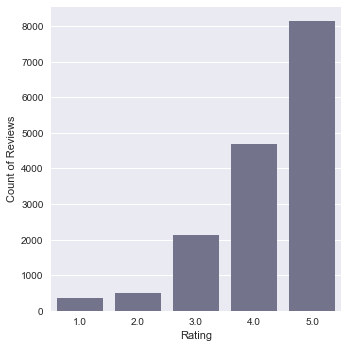

In [89]:
# Plot bar graph of review counts by rating
plt.figure(figsize=(5,5))
reviewcounts_rating = sns.barplot(countbyrating_df.Rating, countbyrating_df.Count, color="blue", saturation=0.1)
reviewcounts_rating.set(xlabel='Rating', ylabel='Count of Reviews')
plt.tight_layout()
plt.savefig('fig102.png', format='png', dpi=300)

## Average Rating By Retail Company

In [28]:
# Create dataframe with average rating by company
avgbycompany = reviews_retail.groupby('company').agg({'rating': 'mean'}).sort_values('rating', ascending = False)
avgbycompany_df = avgbycompany.reset_index()

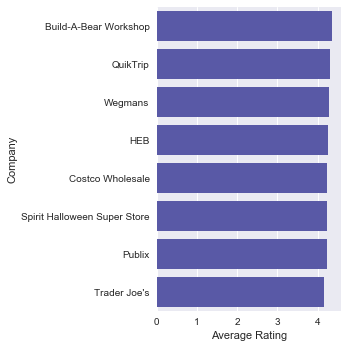

In [90]:
# Plot bar graph of average rating by company
plt.figure(figsize=(5,5))
avgrating_company = sns.barplot(avgbycompany_df.rating, avgbycompany_df.company, color="blue", saturation=0.3)
avgrating_company.set(xlabel='Average Rating', ylabel='Company')
plt.tight_layout()
plt.savefig('fig103.png', format='png', dpi=300)

## Average Rating By Month

In [34]:
# Create dataframe with average rating by month
avgbymonth = reviews_retail.groupby('month').agg({'rating': 'mean'})
avgbymonth = avgbymonth.reset_index()

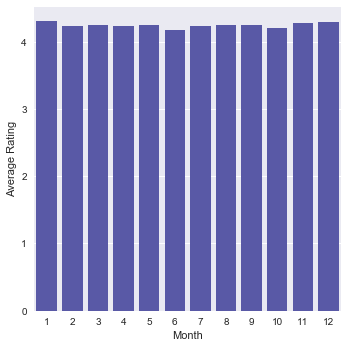

In [91]:
# Plot bar graph of average rating by month
plt.figure(figsize=(5,5))
avgrating_month = sns.barplot(avgbymonth.month, avgbymonth.rating, color="blue", saturation=0.3)
avgrating_month.set(xlabel='Month', ylabel='Average Rating')
plt.tight_layout()
plt.savefig('fig104.png', format='png', dpi=300)

## Heatmap: Company vs Monthly Average Rating

In [36]:
# Calculate monthly average rating by company
HeatMonthComp = reviews_retail.groupby(['company','month']).agg({'rating':'mean'})
HeatMonthComp = HeatMonthComp.reset_index()

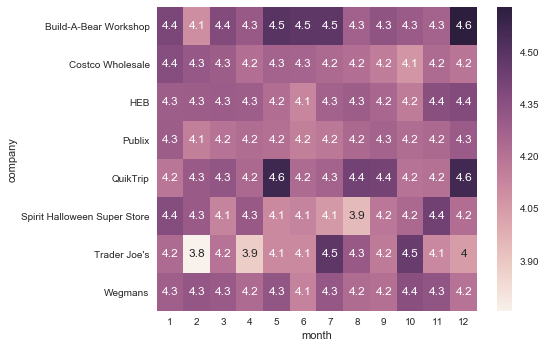

In [73]:
# Draw heatmap for monthly average rating by company
HeatMonthComp_rect = HeatMonthComp.pivot("company", "month", "rating")
plt.figure(figsize=(8,5))
sns.heatmap(HeatMonthComp_rect, annot=True)
plt.tight_layout()
plt.savefig('fig105.png', format='png', dpi=300)

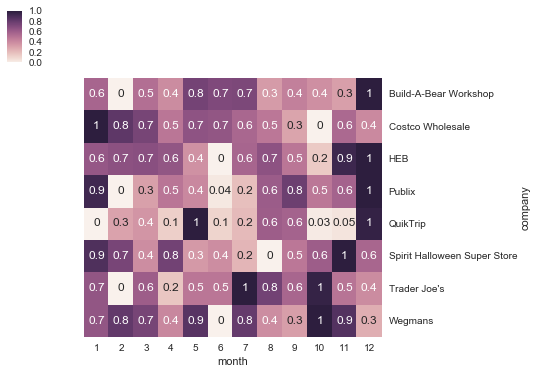

In [172]:
# Draw heatmap for monthly average rating by company (scaled)
HeatMonthCompCluster = sns.clustermap(HeatMonthComp_rect, annot = True, fmt = '.1g', col_cluster = False, row_cluster = False, figsize = (8, 6), standard_scale=0)
plt.setp(HeatMonthCompCluster.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.gcf().subplots_adjust(left = 0.05, right = 0.7)
plt.savefig('fig106.png', format='png', dpi=300)

Based on monthly average ratings, it appears that the majority of retail companies score the highest in December. To further understand the situation, let's get monthly count of reviews with scores below 3.

In [40]:
# Count monthly review rating below a score of 3 by company
HeatMonthComp_below3 = reviews_retail.groupby(['company','month']).apply(lambda x: pd.Series(dict(
    negative =(x.rating < 3).sum())))
HeatMonthComp_below3 = HeatMonthComp_below3.reset_index()

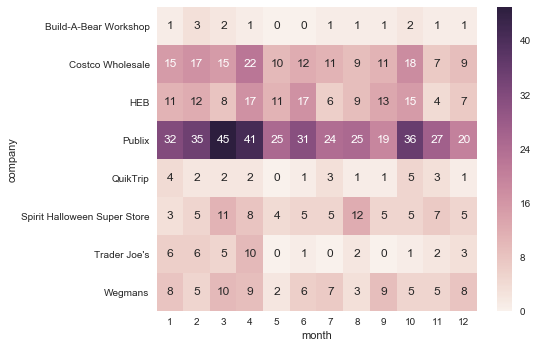

In [75]:
# Draw heatmap for monthly counts of negative reviews (rating < 3.0) by company
HeatMonthComp_below3_rect = HeatMonthComp_below3.pivot("company", "month", "negative")
plt.figure(figsize=(8,5))
sns.heatmap(HeatMonthComp_below3_rect, annot=True, fmt='g')
plt.tight_layout()
plt.savefig('fig107.png', format='png', dpi=300)

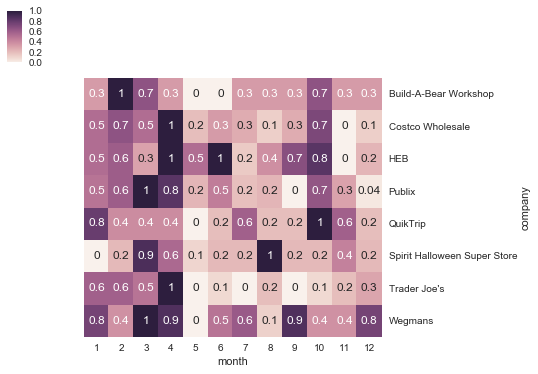

In [173]:
# Draw heatmap for monthly counts of negative reviews (rating < 3.0) by company (scaled)
HeatMonthComp_below3Cluster = sns.clustermap(HeatMonthComp_below3_rect, annot = True, fmt='.1g', col_cluster = False, row_cluster = False, figsize = (8, 6), standard_scale=0)
plt.setp(HeatMonthComp_below3Cluster.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.gcf().subplots_adjust(left = 0.05, right = 0.7)
plt.savefig('fig108.png', format='png', dpi=300)

From the two observations above, it can be seen that March, April, and October suffer the most for the highest count of bad reviews (score below 3). Let's take a look at monthly count of reviews that scored above 3.

In [43]:
# Count monthly review rating above a score of 3 by company
HeatMonthComp_above3 = reviews_retail.groupby(['company','month']).apply(lambda x: pd.Series(dict(
    positive =(x.rating > 3).sum())))
HeatMonthComp_above3 = HeatMonthComp_above3.reset_index()

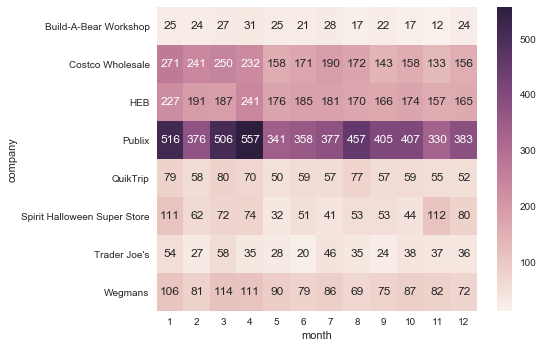

In [77]:
# Draw heatmap for monthly counts of positive reviews (rating > 3.0) by company
HeatMonthComp_above3_rect = HeatMonthComp_above3.pivot("company", "month", "positive")
plt.figure(figsize=(8,5))
sns.heatmap(HeatMonthComp_above3_rect, annot=True, fmt='g')
plt.tight_layout()
plt.savefig('fig109.png', format='png', dpi=300)

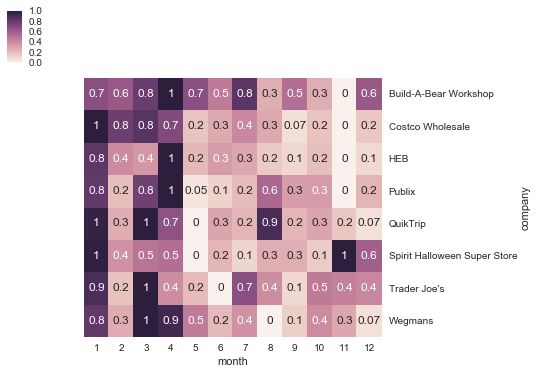

In [174]:
# Draw heatmap for monthly counts of positive reviews (rating > 3.0) by company (scaled)
HeatMonthComp_above3Cluster = sns.clustermap(HeatMonthComp_above3_rect, annot = True, fmt = '.1g', col_cluster = False, row_cluster = False, figsize = (8, 6), standard_scale=0)
plt.setp(HeatMonthComp_above3Cluster.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.gcf().subplots_adjust(left = 0.05, right = 0.7)
plt.savefig('fig110.png', format='png', dpi=300)

From the observation above, it can be seen that January, March, and April are months where  companies received a high number of high scoring reviews (score > 3).

Here is another way of visualizing the breakdown of ratings by company. In each histogram, the leftmost bar represents the month of January and the rightmost column represents the month of December.

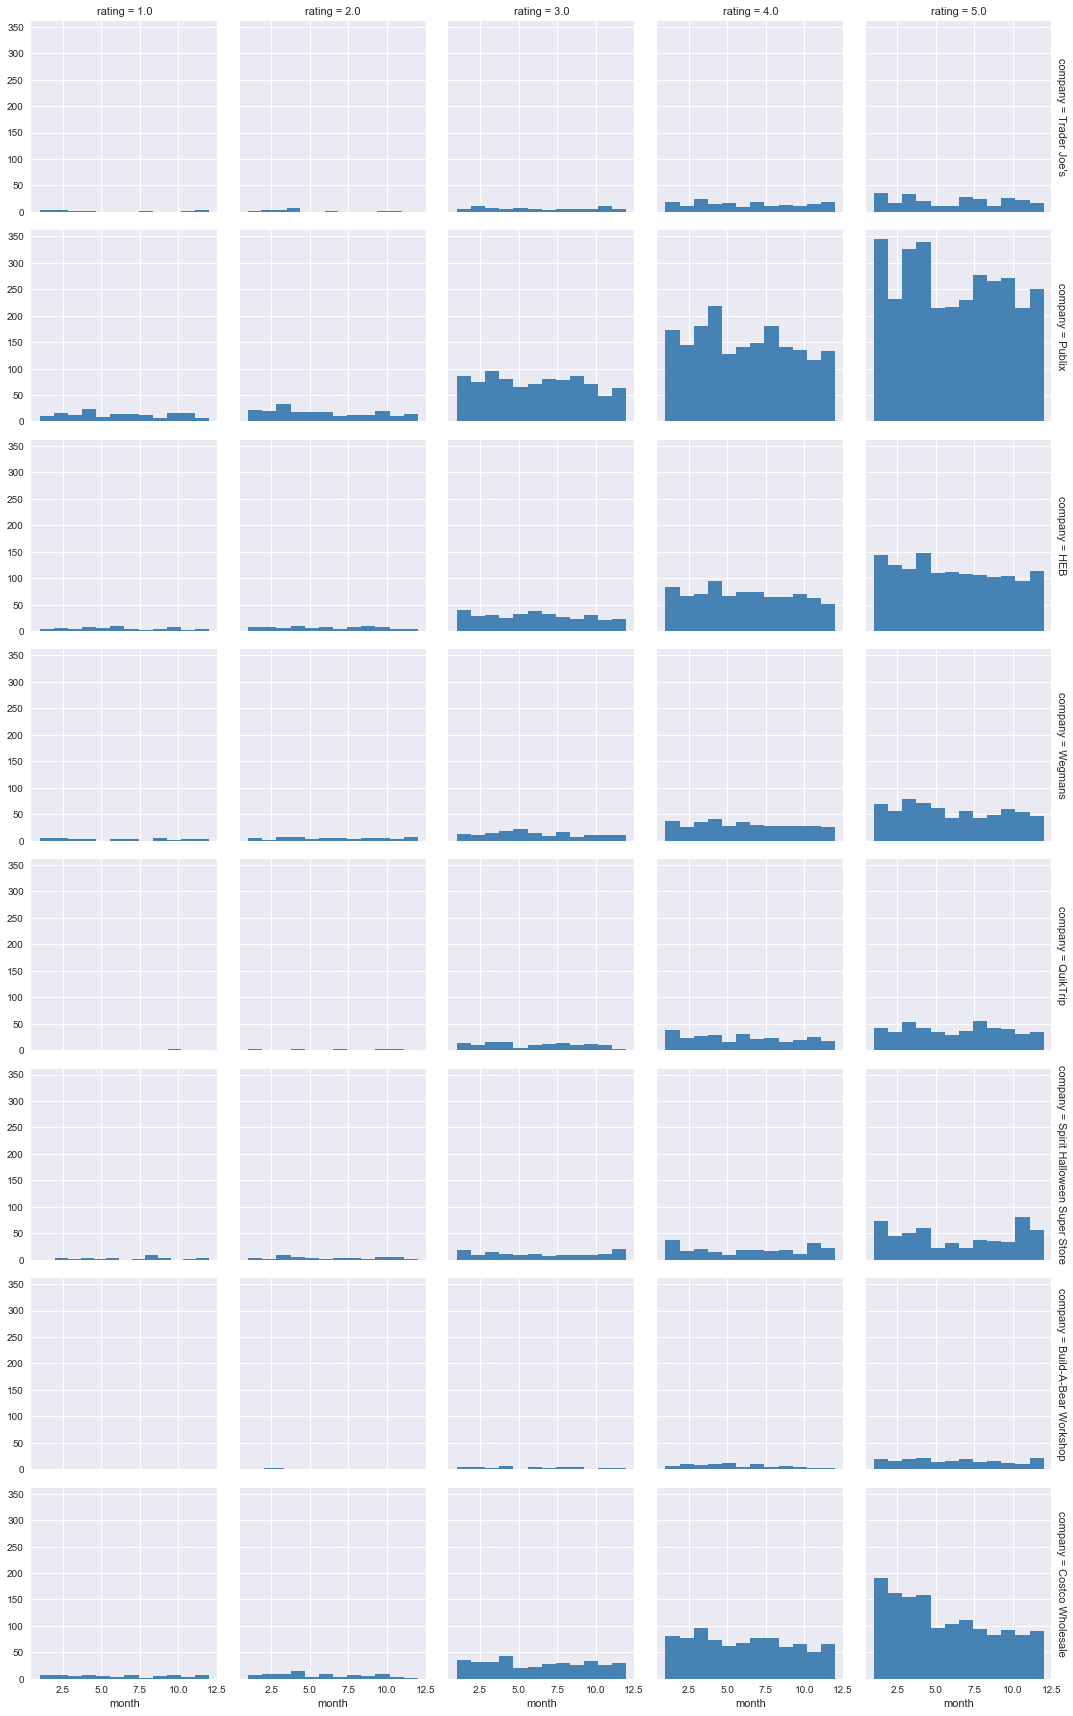

In [180]:
# Faceting monthly count of review ratings by company 
sns.set(style="darkgrid")
g = sns.FacetGrid(reviews_retail, row = 'company', col="rating", margin_titles=True)
g.map(plt.hist, "month", color="steelblue", bins = 12)
plt.savefig('fig111.png', format='png', dpi=300)

To further understand what is driving positive and negative reviews, we will conduct a sentiment analysis and wordclouds in R (see R scripts).

In [47]:
# write to csv for sentiment analysis in R
reviews_retail.to_csv('reviews.csv', sep=',')

## Topic Modeling with PyLDAvis

To better understand the positive and negative comments amongst employee's reviews, we will use pyLDAvis to help us topic model (see pyLDAvis jupyter notebook). The following commands allows us to create the necessary components to use pyLDAvis (i.e. dictionary, corpus, and model).

In [183]:
from gensim.parsing.preprocessing import preprocess_documents
from gensim import corpora, models

In [185]:
# Concatenate header and comment into review; later we will topic model pros and cons separately
reviews_retail['review'] = reviews_retail['header'] + ' ' + reviews_retail['comment']

In [186]:
# Convert reviews to string to prepare for model creation
reviews_retail.pro = reviews.pro.astype(str)
reviews_retail.con = reviews.con.astype(str)

In [187]:
# Convert reviews into lists to prepare for model creation
reviews_pro = reviews_retail.pro.tolist()
reviews_con = reviews_retail.con.tolist()

In [188]:
# Create model for positive reviews
processed_docs = preprocess_documents(reviews_pro)
dictionary = corpora.Dictionary(processed_docs)
dictionary.save('reviews_pro.dict')
corpus = [dictionary.doc2bow(review) for review in processed_docs]
corpora.MmCorpus.serialize('reviews_pro.mm', corpus)
lda = models.LdaModel(corpus, id2word = dictionary, alpha = 'asymmetric', num_topics=10, iterations= 500)
lda.save('lda_pro.model')

In [189]:
# Create model for negative reviews
processed_docs = preprocess_documents(reviews_con)
dictionary = corpora.Dictionary(processed_docs)
dictionary.save('reviews_con.dict')
corpus = [dictionary.doc2bow(review) for review in processed_docs]
corpora.MmCorpus.serialize('reviews_con.mm', corpus)
lda = models.LdaModel(corpus, id2word = dictionary, alpha = 'asymmetric', num_topics=10, iterations= 500)
lda.save('lda_con.model')